In [1]:
#Import pandas, matplotlib.pyplot, and seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
from datetime import datetime, date
import numpy as np
from numpy import mean
from numpy import std
from library.sb_utils import save_file

In [2]:
#import Kaggle House Price Train Data set .csv
train_data = pd.read_csv('C:/Springboard_/CapstoneTwo/Data Files/Kaggle House Prices/train.csv')

In [3]:
train_data.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Ut

In [4]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#Identifying attributes with the most missing values
missing = pd.concat([train_data.isnull().sum(), 100*train_data.isnull().mean()],axis=1)
missing.columns=['count','%']
missing.sort_values(by=['count','%']).tail(20)

,count,%
SalePrice,0,0.000000
Electrical,1,0.068493
MasVnrType,8,0.547945
MasVnrArea,8,0.547945
BsmtQual,37,2.534247
BsmtCond,37,2.534247
BsmtFinType1,37,2.534247
BsmtExposure,38,2.602740
BsmtFinType2,38,2.602740
GarageType,81,5.547945


In [6]:
#Missing values being equal across basement and garage categories makes sense as not all houses have those ammeneties.
#It also seems a vast majority of houses do not have pools.
#Luckily sale price has no missing records

In [7]:
#The only missing value that was not easily explained was in the 'ELectrical' column. 
train_data['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [8]:
#It should be sufficient to replace the missing value with the most common electrical type, SBrkr
train_data['Electrical'].fillna(value='SBrkr',inplace = True)

In [9]:
#Checking that the null value was replaced and nothing else.
train_data['Electrical'].value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [10]:
#Replacing missing values with 0 for attributes where it is expected (i.e. no pool for pool area)
train_data.fillna(value=0, inplace = True)

In [11]:
#Confirming that all null values were given a value of 0.
missing = pd.concat([train_data.isnull().sum(), 100*train_data.isnull().mean()],axis=1)
missing.columns=['count','%']
missing.sort_values(by=['count','%']).tail(20)

,count,%
GarageCars,0,0.0
GarageArea,0,0.0
GarageQual,0,0.0
GarageCond,0,0.0
PavedDrive,0,0.0
WoodDeckSF,0,0.0
OpenPorchSF,0,0.0
EnclosedPorch,0,0.0
3SsnPorch,0,0.0
ScreenPorch,0,0.0


In [12]:
#Checking for non-numerical features
train_data.select_dtypes('object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,0,0,0,WD,Normal
1,RL,Pave,0,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,0,0,0,WD,Normal
2,RL,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,0,0,0,WD,Normal
3,RL,Pave,0,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,0,0,0,WD,Abnorml
4,RL,Pave,0,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,0,0,0,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,0,0,0,WD,Normal
1456,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,0,MnPrv,0,WD,Normal
1457,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,0,GdPrv,Shed,WD,Normal
1458,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,0,0,0,WD,Normal


In [13]:
today = np.datetime64('today')
type(today)

numpy.datetime64

In [14]:
#There are two attributes, Month sold and year sold, these need to be combined and converted into age
train_data['Age_of_sale']= today - pd.to_datetime(dict(year=train_data.YrSold, month=train_data.MoSold, day=1))
print(train_data['Age_of_sale'])

0      4920 days
1      5196 days
2      4707 days
3      5650 days
4      4616 days
          ...   
1455   5104 days
1456   4189 days
1457   4100 days
1458   4130 days
1459   4799 days
Name: Age_of_sale, Length: 1460, dtype: timedelta64[ns]


In [15]:
#Checking that our new column was added to our data frame.
train_data.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave     0      Reg   
1        2          20       RL         80.0     9600   Pave     0      Reg   
2        3          60       RL         68.0    11250   Pave     0      IR1   
3        4          70       RL         60.0     9550   Pave     0      IR1   
4        5          60       RL         84.0    14260   Pave     0      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave     0      Reg   
1456  1457          20       RL         85.0    13175   Pave     0      Reg   
1457  1458          70       RL         66.0     9042   Pave     0      Reg   
1458  1459          20       RL         68.0     9717   Pave     0      Reg   
1459  1460          20       RL         75.0     9937   Pave     0      Reg   

     LandContour Ut

In [16]:
#Now removing columns that won't be used in our analysis (ID, MoSold, YrSold)
del train_data['Id']
del train_data['MoSold']
del train_data['YrSold']
train_data.info

<bound method DataFrame.info of       MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave     0      Reg   
1             20       RL         80.0     9600   Pave     0      Reg   
2             60       RL         68.0    11250   Pave     0      IR1   
3             70       RL         60.0     9550   Pave     0      IR1   
4             60       RL         84.0    14260   Pave     0      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60       RL         62.0     7917   Pave     0      Reg   
1456          20       RL         85.0    13175   Pave     0      Reg   
1457          70       RL         66.0     9042   Pave     0      Reg   
1458          20       RL         68.0     9717   Pave     0      Reg   
1459          20       RL         75.0     9937   Pave     0      Reg   

     LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC  Fence  \
0          

In [17]:
#Looking at distribution of house sales in the various neighborhoods
train_data['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [18]:
#Establish a variable storing mean home sale prices by neighborhood for future use
neighborhood_price_means = train_data.groupby('Neighborhood')[['SalePrice']].mean()
neighborhood_price_means.head()

,SalePrice
Neighborhood,
Blmngtn,194870.882353
Blueste,137500.000000
BrDale,104493.750000
BrkSide,124834.051724
ClearCr,212565.428571


In [19]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460,56.8973,42.3006,20,20,50,70,190
LotFrontage,1460,57.6233,34.6643,0,42,63,79,313
LotArea,1460,10516.8,9981.26,1300,7553.5,9478.5,11601.5,215245
OverallQual,1460,6.09932,1.383,1,5,6,7,10
OverallCond,1460,5.57534,1.1128,1,5,5,6,9
YearBuilt,1460,1971.27,30.2029,1872,1954,1973,2000,2010
YearRemodAdd,1460,1984.87,20.6454,1950,1967,1994,2004,2010
MasVnrArea,1460,103.117,180.731,0,0,0,164.25,1600
BsmtFinSF1,1460,443.64,456.098,0,0,383.5,712.25,5644
BsmtFinSF2,1460,46.5493,161.319,0,0,0,0,1474


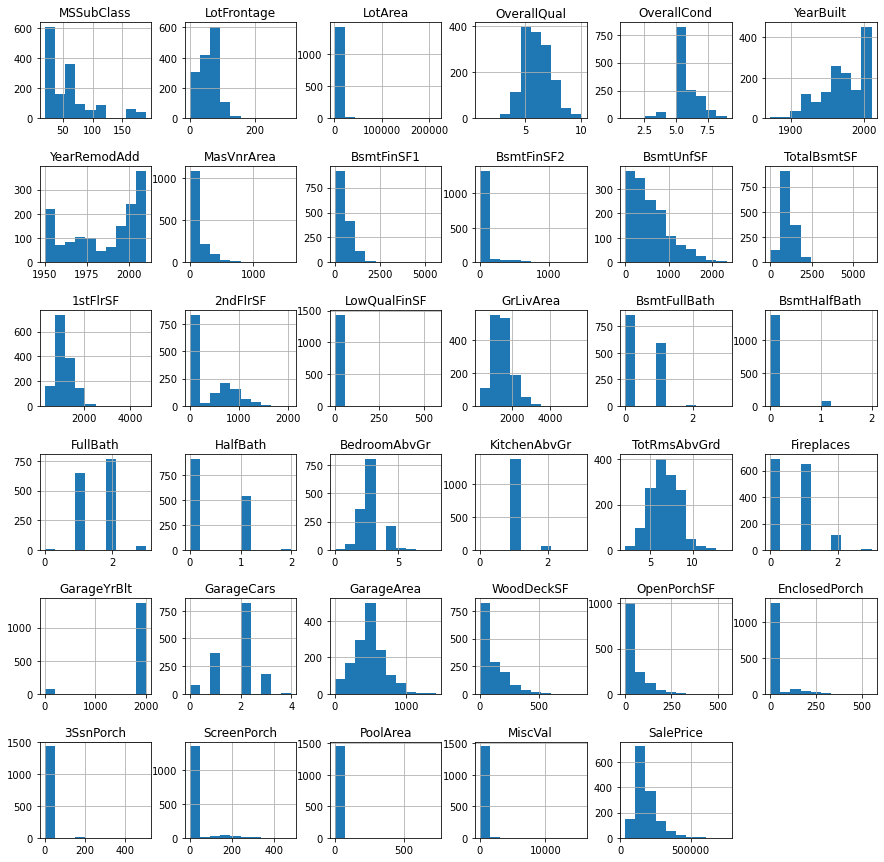

In [20]:
#Histogram plots to observe potential outliers
train_data.hist(figsize=(15,15))
plt.subplots_adjust(hspace=0.5);

In [21]:
#Possible outliers: LotArea, LowQualFinSF, EnclosedPorch, MiscVal

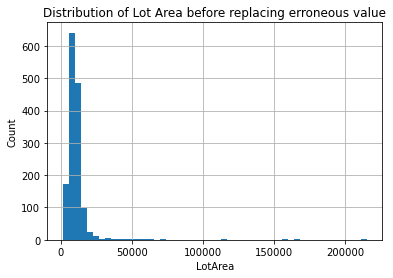

In [22]:
train_data.LotArea.hist(bins=50)
plt.xlabel('LotArea')
plt.ylabel('Count')
plt.title('Distribution of Lot Area before replacing erroneous value');

In [23]:
train_data.LotArea.describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

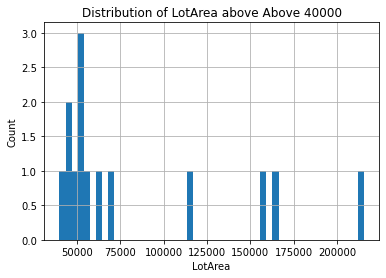

In [24]:
#Plot showing LotAreas above 40,000
train_data.LotArea[train_data.LotArea>40000].hist(bins=50)
plt.xlabel('LotArea')
plt.ylabel('Count')
plt.title('Distribution of LotArea above Above 40000');

In [25]:
#Dropping all LotArea values greater than 3 standard deviates above the mean.
train_data = train_data[train_data.LotArea<75000]
train_data.shape

(1456, 79)

In [26]:
train_data[train_data.MiscVal>1000].T

,346,392,510,539,705,767,786,890,1171,1230,1328,1386,1457
MSSubClass,20,20,20,20,190,50,50,50,20,90,50,60,70
MSZoning,RL,RL,RL,RL,RM,RL,RM,RL,RL,RL,RM,RL,RL
LotFrontage,0,0,75,0,70,75,60,60,76,0,60,80,66
LotArea,12772,8339,14559,11423,5600,12508,10800,8064,9120,18890,10440,16692,9042
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave
...,...,...,...,...,...,...,...,...,...,...,...,...,...
MiscVal,15500,1200,2000,2000,3500,1300,1200,2000,1400,8300,1150,2000,2500
SaleType,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD
SaleCondition,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal
SalePrice,151500,106500,164900,272000,55000,160000,139000,122900,163000,190000,256000,250000,266500


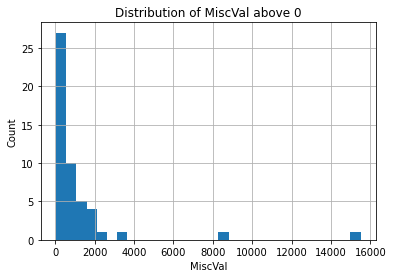

In [27]:
#Misc Value > 0
train_data.MiscVal[train_data.MiscVal>0].hist(bins=30)
plt.xlabel('MiscVal')
plt.ylabel('Count')
plt.title('Distribution of MiscVal above 0');

In [28]:
#Removing MiscVal Outliers
train_data=train_data[train_data.MiscVal<8000]

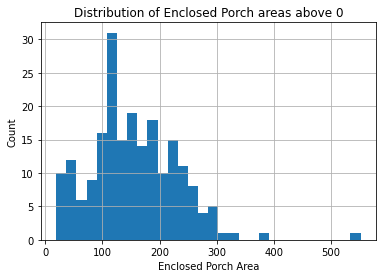

In [29]:
#Enclosed porch area > 0
train_data.EnclosedPorch[train_data.EnclosedPorch>0].hist(bins=30)
plt.xlabel('Enclosed Porch Area')
plt.ylabel('Count')
plt.title('Distribution of Enclosed Porch areas above 0');

In [30]:
#Removing EnclosedPorch Outliers
train_data=train_data[train_data.EnclosedPorch<500]

In [34]:
#Saving cleaned data to new csv
datapath = 'C:\Springboard_\CapstoneTwo\Data Files'
save_file(train_data,'train_data_cleaned.csv', datapath)

Writing file.  "C:\Springboard_\CapstoneTwo\Data Files\train_data_cleaned.csv"
